# Uso de NLTK
## Accediendo a corpora y a diccionarios

Un poco de contexto antes: NLTK (Natural Language Toolkit) es una API que ofrece un cojunto de herramientas para hacer procesamiento de lenguaje en prácticamente todo el pipeline:

- Creación del corpus
- Tokenización
- Etiquetado
- Análisis

Vamos a comenzar haciendo una breve exploración sobre los recursos que nos ofrece la herramienta

## Preliminares

Para poder acceder a los recursos, suponemos que ya se descargaron e instalaron los paquetes utlizando el NLTK_data. En caso contrario, se deben desdargar utilizando el siguiente código:

In [ ]:
import nltk
nltk.download()

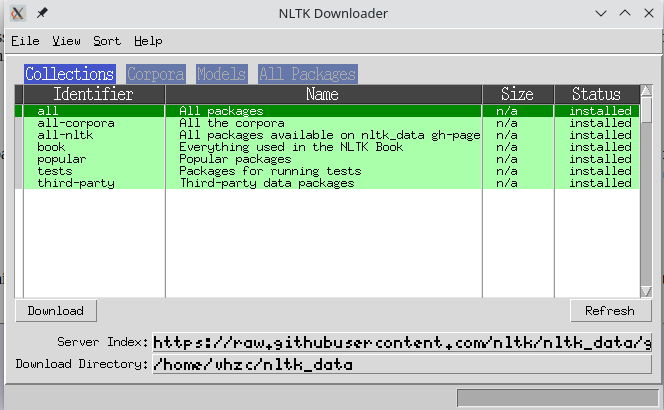

En esta figura, podemos observar que todo está marcado en verde lo que significa que está descargado e instalado.

## Accediendo a diferentes corpora

Uno de los corpora más básicos (pero no poco intersantes) que tenemos disponibles son los libros del proyecto Gutenberg (de hecho sólo una mínima parte). Para acceder a los libros utilizamos el siguiente código:

In [ ]:
# Listamos los archivos disponibles
# cada archivo txt corresponde a un libro
# el formato es [apellidoDelAutor]-[nombreDelLibro].txt

nltk.corpus.gutenberg.fileids()

In [ ]:
#Guardamos la referencia para teclear menos
from nltk.corpus import gutenberg
# Hacemos un ciclo para imprimir algunas estadísticas de cada uno de los textos disponibles
for file in gutenberg.fileids():
    numChars = len(gutenberg.raw(file))
    numWords = len(gutenberg.words(file))
    numSents = len(gutenberg.sents(file))
    numVocab = len(set(w.lower() for w in gutenberg.words(file)))
    print(round(numChars/numWords), round(numWords/numSents), round(numWords/numVocab), file)
    

## Accediendo conversaciones más coloquiales

El corpus webtext contiene los siguientes archivos:

- firefox.txt -> Texto de un foro de discusión de Firefox
- grail.txt -> El script de la película "Monthy Python and the Holy Grail"
- overheard.txt -> Transcripciones de conversaciones que se escucharon en las calles de NYC
- pirates.txt -> El scrip de la película "Pirates of the Caribean: Dead man's chest"
- singles.txt -> Transcripciones de avisos clasificados en la era pre-tinder
- wine.txt -> Descripciones de algunos vinos

In [ ]:
from nltk.corpus import webtext
webtext.fileids()

In [ ]:
#vamos a revisar qué hay en cada archivo
for file in webtext.fileids():
    print(file, webtext.raw(file)[:65], '....')

El corpus nps_chat contiene alrededor de 10,000 post en foros de internet que se han usado para tratar de elaborar scripts que detecten automáticamente a depredadores en el internet.

Este corpus se organiza en 15 archivos, cada uno de los cuales tiene post organizados por día y correspondiente a un rango de edad. Estos archivos están etiquetados y su formato es XML.


In [ ]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]
for post in chatroom:
    print(post)


## Brown Corpus

Este corpus contiene muchos archivos pero tiene la característica de que dichos archivos están organizados por categorías. Un ejemplo de dichas categorías lo podemos ver en la figura siguiente:

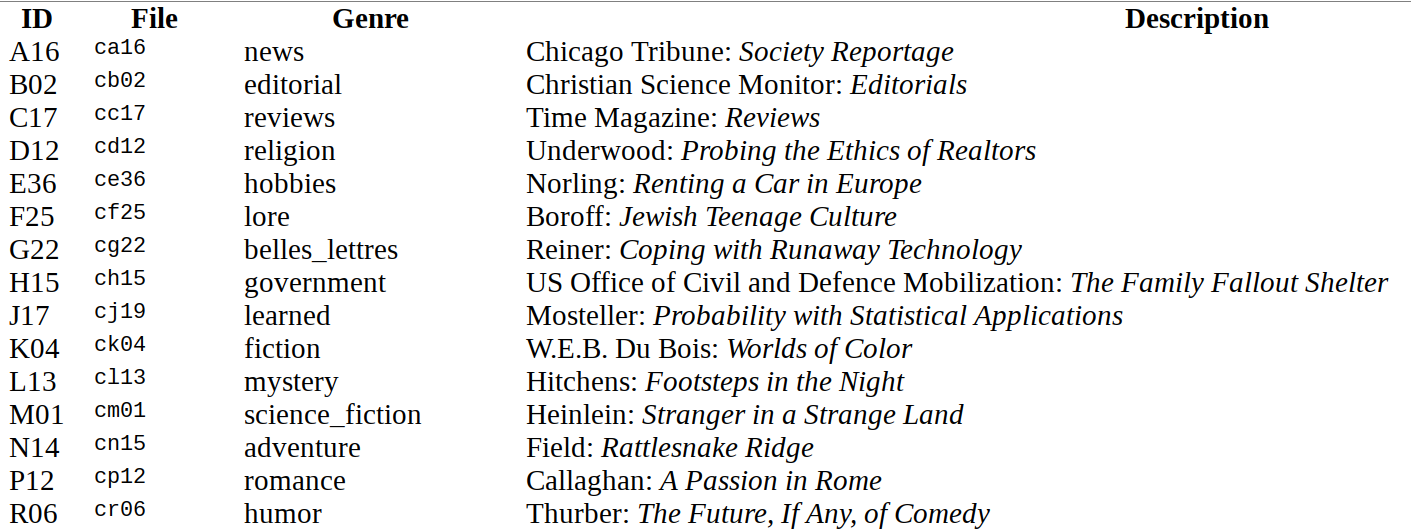

Para un listado completo de los archivos y las categorías. En el directorio NLTK_data/corpora/brown se puede acceder al archivo **"Readme.txt"**

In [ ]:
from nltk.corpus import brown
#Podemos acceder a una o varias categorias especificandolo en el
# llamado a la función que queremos utilizar
brown.fileids(categories="news")


Podemos aprovechar que el corpus está separado por categorías para hacer un estudio que nos permita diferenciar el uso del lenguaje dependiendo de la categoría del escrito.
Por ejemplo, podemos hacer una estadística sobre las diferentes formas de utilizar los verbos "modales" en inglés.

In [ ]:
import nltk
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

In [ ]:
cfd = nltk.ConditionalFreqDist((genre, word)
                                for genre in brown.categories()
                                for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

## Reuters Corpus

El corpus Reuters contiene más de 10,000 documentos que suman más de 1.3 millones de palabras. Estos documentos se han clasificado en 90 tópicos (temas) y se dividen en dos conjuntos: en cojunto de entrenamiento y el conjunto de prueba (*training set* y *test set*). Esta división hace que este corpus pueda ser utilizado para entrenar algoritmos aprendizaje automático sobre el texto.

Una característica que diferencía este corpus de corpus Brown es que las categorías no son excluyentes. Esto se debe a que en un documento de noticias, se pueden abordar diferentes temas o perspectivas.

Otra característica es que para acceder a los documentos de este corpus, podemos usar uno o varios fileids al mismo tiempo


In [ ]:
from nltk.corpus import reuters
print(reuters.fileids())
print(reuters.categories())

In [ ]:
# podemos ver a qué categorías pertenece algún archivo particular
print(reuters.categories('training/9865'))
# A qué categoría pertenece un grupo de archivos
print(reuters.categories(['training/9865', 'training/9880']))
# Qué archivos pertenecen a alguna categoría dada
print(reuters.fileids('barley'))
#qué archivos pertenecen a un cojunto de categorías
print(reuters.fileids(['barley','corn']))

## Corpus de discursos inaugurales

Cómo lo hemos visto anteriormente, este corpus guarda una transcripción de todos los discursos que ha hecho cada presidente de los USA cuando comienza su mandato, conocido como el "Inaugural Address"

Están ordenados de acuerdo al apellido del presidente y el año del discurso.

Podemos utilizar este corpus para conocer un poco sobre los temas centrales en la administración de los USA a lo largo del tiempo, así como analizar algunos cambios en el uso del lenguaje a lo largo del tiempo

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
from nltk.corpus import inaugural
files = inaugural.fileids()
print(len(files))
#print(inaugural.fileids())

# Dado que el año es una parte del nombre de cada archivo,
# podemos usar expresiones regulares para extraer los años (también operaciones en listas)
years = [fileid[:4] for fileid in inaugural.fileids()]
print(years)

# podemos aprovechar esto para construir una tabla con frecuencias condicionales
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                                for fileid in inaugural.fileids()
                                for w in inaugural.words(fileid)
                                for target in ['america', 'citizen']
                                if w.lower().startswith(target))
cfd.plot()

## Corpora etiquetado (Annotated Text Corpora)

NLTK también nos ofrece una cantidad de corpora anotados que podemos utilizar para probar y/o ejemplificar el funcionamiento de algunos algoritmos para hacer anotaciones en el texto.

Más adelante vamos a ver cómo utilizar estos recursos

Los corpora disponibles son:
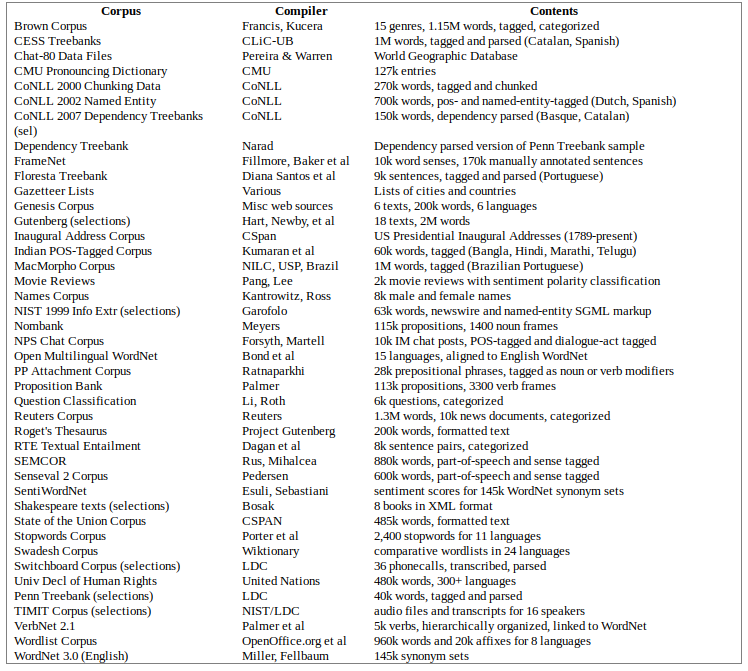

## Corpora en otras lenguas

NLTK ofrece corpora en otras lenguas ademṕas del inglés. Hay que tomar en cuenta para trabajar con ellos, que muchos usan caracteres no estándar y por lo tanto tenemos que aprender a trabajar con caracteres UNICODE.

Un caso interesante es el corpus **udhr** que contiene archivos con la Declaración Universal de los Drechos Humanos traducida en más de 300 lenguas. 

Podemos usar este corpus para comparar la longitud promedio de las palabras en cada lenguaje.



In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10))
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word))
                                for lang in languages
                                for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

## Para concluir

NLTK nos proporciona un conjunto de corpora estructurados de diferente manera según las tareas que querramos experimentar.

De forma general, podemos ver a los corpora agrupados de acuerdo a su estructura como lo muestra la figura siguiente:

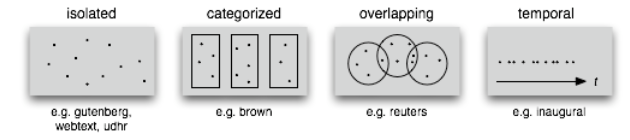



Finalmente, te presento una tabla con los métodos que están definidos en el módulo corpus de NLTK (NLTK.corpus). Más adelante usaremos algunos.
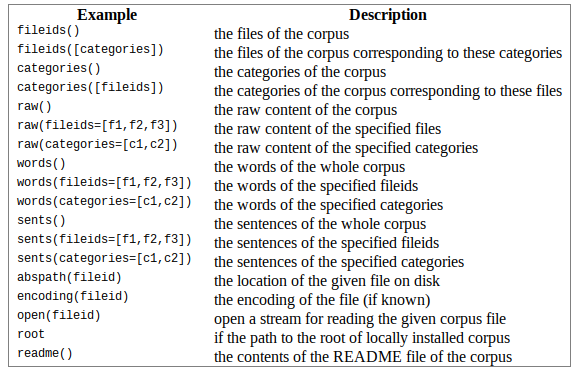


Para conocer a detalle su funcionamiento puedes visitar las páginas de documentación de la API de NLTK
https://www.nltk.org/api/nltk.html

O las guías en la página de NLTK HOW-TOs https://www.nltk.org/howto/